# Real Estate Price Regression

In [1]:
# Imports
import pandas as pd # Para el procesamiento de datos

import seaborn as sns # Gráficos
import matplotlib.pyplot as plt # Gráficos

# Machine Learning
from sklearn.model_selection import train_test_split # Divide el dataset (train, test)
from sklearn.preprocessing import StandardScaler # Estandarizamos o Normalizamos los datos


# Métricas
from sklearn.metrics import mean_absolute_error # Error absoluto del modelo
from sklearn.metrics import mean_squared_error # Error cuadrático medio del modelo
import numpy as np


# Regresión Lineal
from sklearn.linear_model import LinearRegression


# Máquinas de vectores de soporte - Regresión de vectores de soporte
from sklearn.svm import SVR

'''
Ayuda a encontrar los mejores hiperparámetros para un modelo mediante 
la prueba de todas las combinaciones posibles de valores de hiperparámetros 
y la selección de aquellos que proporcionan el mejor rendimiento.
'''
from sklearn.model_selection import GridSearchCV


# Random Forest 
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Leemos nuestro dataset y lo guardamos en una variable
data = pd.read_csv( "Real estate.csv" )

## Data Analysis

In [3]:
# Visualizamos nuestros datos
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# Revisamos las dimensiones de nuestro dataset
data.shape

(414, 8)

In [5]:
# Miramos las columnas que tenemos para saber si necesitan un cambio
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [6]:
# Renombramos algunas columnas
data.columns = [    'No', 'TransactionDate', 'HouseAge', 
                    'DistanceMRT', '#convenienceStore', 
                    '#Latitude', 'Longitude',
                    'PriceUnitArea' 
                ]

In [7]:
data.head()

,No,TransactionDate,HouseAge,DistanceMRT,#convenienceStore,#Latitude,Longitude,PriceUnitArea
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Analizamos nuestro dataset

In [8]:
# Revisamos que datos tenemos y de que tipo
data.info() 
# Podemos ver 6 de tipo float64, 2 de tipo int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 414 non-null    int64  
 1   TransactionDate    414 non-null    float64
 2   HouseAge           414 non-null    float64
 3   DistanceMRT        414 non-null    float64
 4   #convenienceStore  414 non-null    int64  
 5   #Latitude          414 non-null    float64
 6   Longitude          414 non-null    float64
 7   PriceUnitArea      414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [9]:
''' 
Obtengamos:
Los valores más bajos(min) y los más altos(max) de cada variable.
La media.
La desviación estándar que muestra la cantidad de variación o dispersión en los datos.
'''

data.describe()

,No,TransactionDate,HouseAge,DistanceMRT,#convenienceStore,#Latitude,Longitude,PriceUnitArea
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


* Casa con el precio unitario más alto

In [10]:
# Buscamos la casa con mayor precio unitario
data["PriceUnitArea"].idxmax()

270

In [11]:
# Informacion de la casa con mayor precio unitario
data.iloc[270]

No                    271.00000
TransactionDate      2013.33300
HouseAge               10.80000
DistanceMRT           252.58220
#convenienceStore       1.00000
#Latitude              24.97460
Longitude             121.53046
PriceUnitArea         117.50000
Name: 270, dtype: float64

* Casa con el precio unitario más bajo

In [12]:
# Buscamos la casa con el menor precio unitario
data["PriceUnitArea"].idxmin()

113

In [13]:
# Informacion de la casa con el menor precio unitario
data.iloc[113]

No                    114.00000
TransactionDate      2013.33300
HouseAge               14.80000
DistanceMRT           393.26060
#convenienceStore       6.00000
#Latitude              24.96172
Longitude             121.53812
PriceUnitArea           7.60000
Name: 113, dtype: float64

* Casa con el precio unitario por area más alto y Casa con el precio unitario por area más bajo 

In [14]:
highestUnitPriceArea = int( data.iloc[270][0] )
lowestUnitPriceArea = int( data.iloc[113][0] )
print(f"El No de la casa con el precio unitario más alto es: {highestUnitPriceArea}. El No de la casa con el precio unitario más bajo es: {lowestUnitPriceArea} ")

El No de la casa con el precio unitario más alto es: 271. El No de la casa con el precio unitario más bajo es: 114 


## Ingeniería de Características

In [15]:
data.columns

Index(['No', 'TransactionDate', 'HouseAge', 'DistanceMRT', '#convenienceStore',
       '#Latitude', 'Longitude', 'PriceUnitArea'],
      dtype='object')

### Borramos las columnas No, TransactionDate.

In [16]:
# Borramos las columnas con las que no queremos trabajar
data.drop( ["No", "TransactionDate"], axis=1, inplace=True )

In [17]:
# Visualizamos nuesstro nuevo dataset
data.head()

,HouseAge,DistanceMRT,#convenienceStore,#Latitude,Longitude,PriceUnitArea
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


### Buscamos valores repetidos, null, outlier, etc (limpiamos el dataset)

* Valores faltantes

In [18]:
data.isna().sum()

HouseAge             0
DistanceMRT          0
#convenienceStore    0
#Latitude            0
Longitude            0
PriceUnitArea        0
dtype: int64

* Valores duplicados

In [19]:
data.duplicated().sum()

0

### Veamos como se correlacionan nuestros datos con 'PriceUnitArea'

In [20]:
'''
Calculamos la correlación de todas las columnas de data 
con respecto a la columna "PriceUnitArea"
'''

data.corr()["PriceUnitArea"].sort_values( ascending=True)

DistanceMRT         -0.673613
HouseAge            -0.210567
Longitude            0.523287
#Latitude            0.546307
#convenienceStore    0.571005
PriceUnitArea        1.000000
Name: PriceUnitArea, dtype: float64

### Representación visual con mapas de calor

<AxesSubplot:>

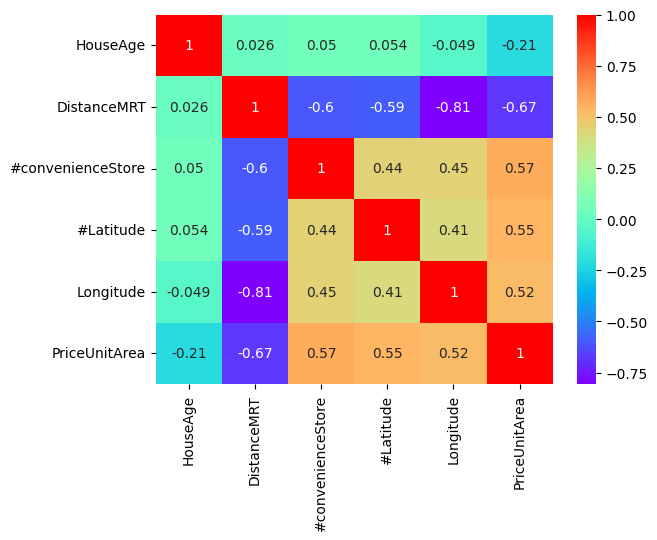

In [21]:
''' 
Los colores más cálidos(1) indican una correlación positiva alta, 
mientras que los colores más fríos(-1) indican una correlación negativa.
''' 
sns.heatmap( data.corr(), annot=True, cmap="rainbow" )

### Representación visual gráfica de dispersión de pares de variables

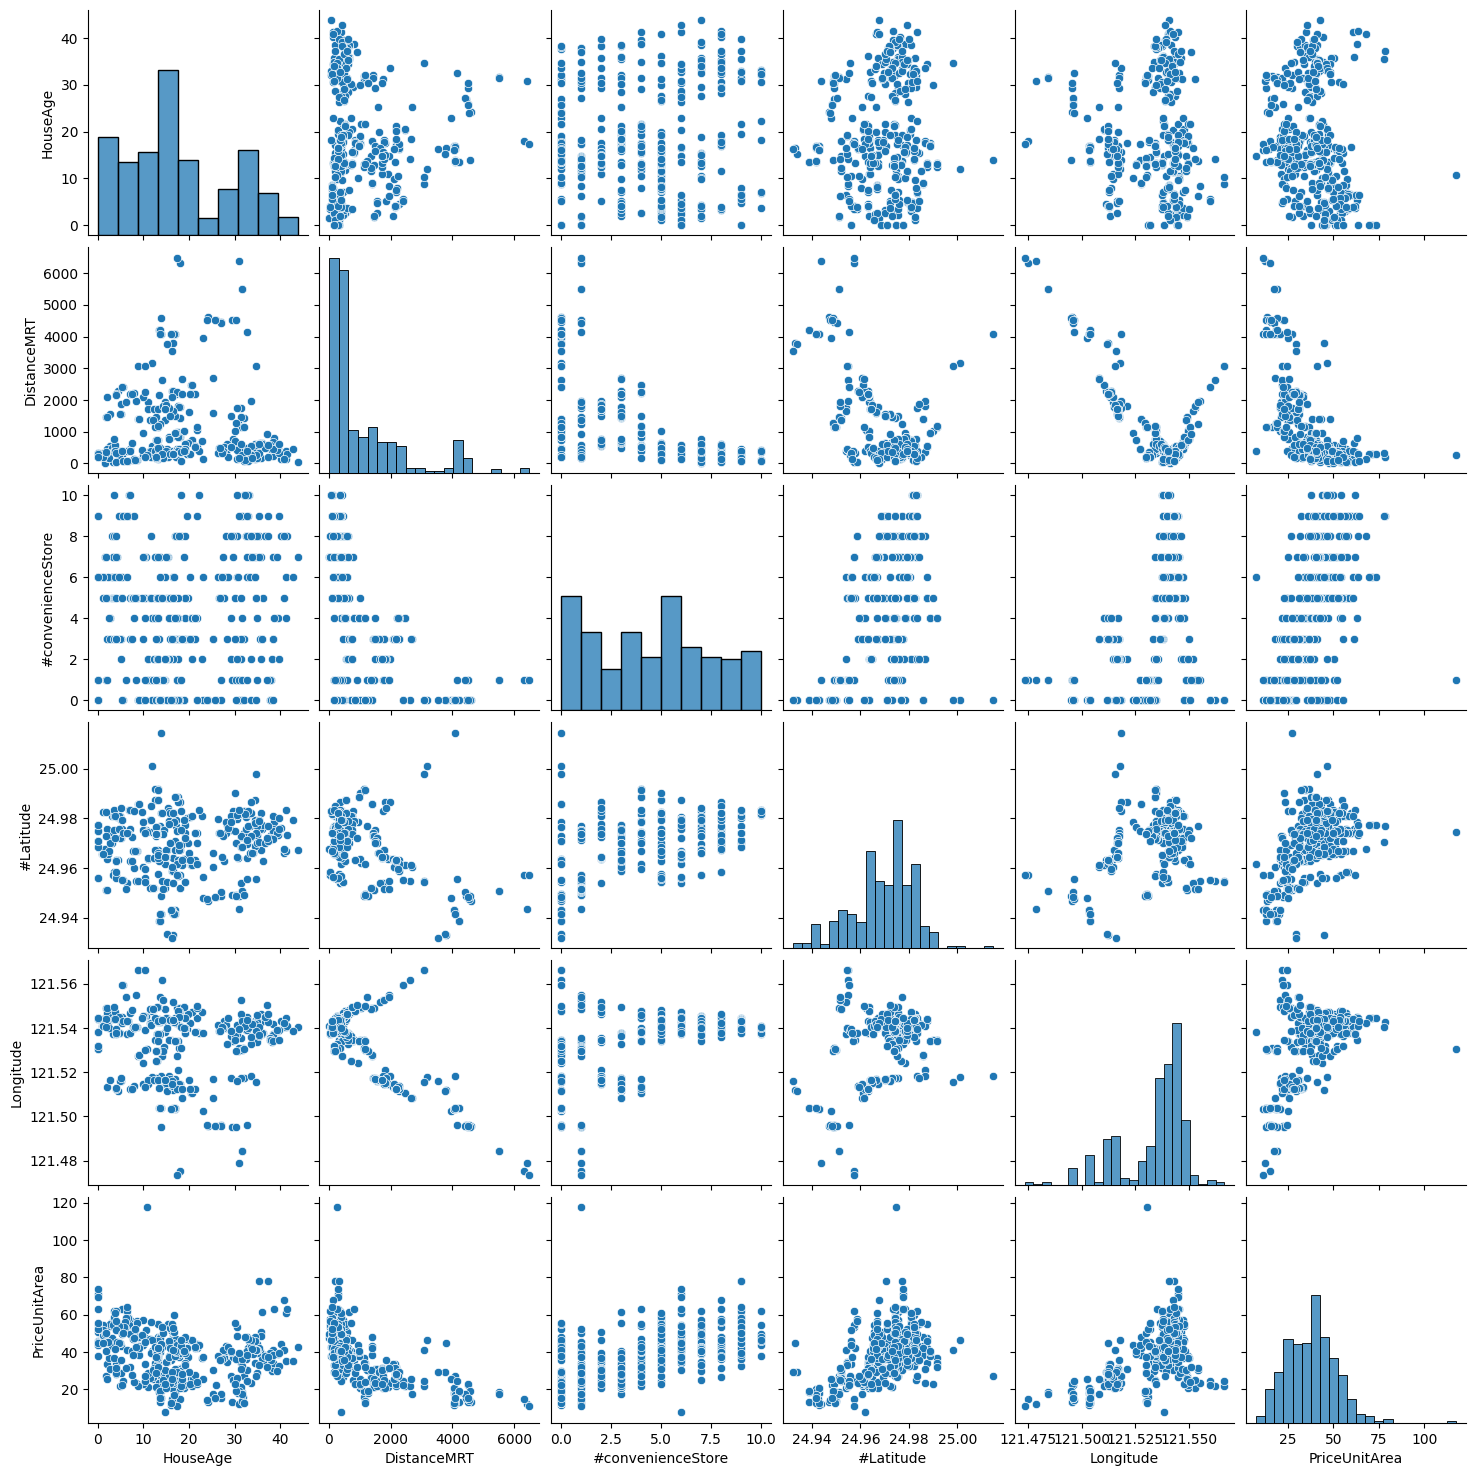

In [22]:
'''
Crea un conjunto de gráficos de dispersión que representan la relación entre 
todas las combinaciones posibles de pares de variables en el conjunto de datos 
data. Cada gráfico de dispersión muestra la relación entre dos variables y, por 
lo tanto, permite identificar cualquier patrón o correlación entre ellas.

Esta visualización es útil en el análisis exploratorio de datos, ya que ayuda a 
detectar patrones y relaciones en los datos y a identificar posibles variables 
que pueden estar relacionadas y que podrían ser importantes para el modelado.
'''

sns.pairplot(data)

### Gráficos de dispersión (scatterplots)

Muestra la relación entre cada una de las variables independientes (DistanceMRT, HouseAge, Longitude, #Latitude, #convenienceStore) y la variable objetivo (PriceUnitArea).

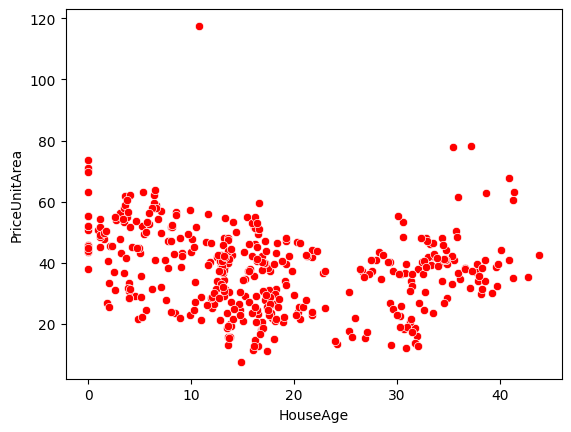

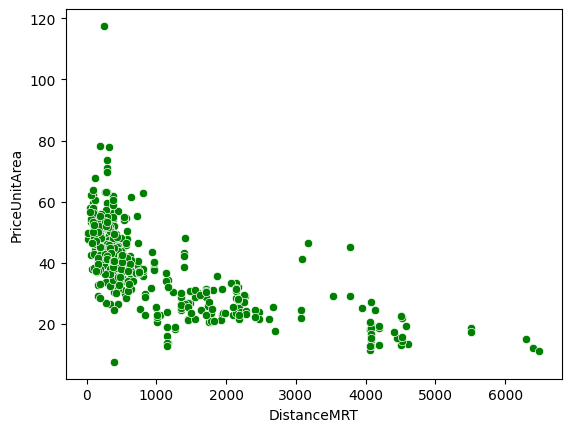

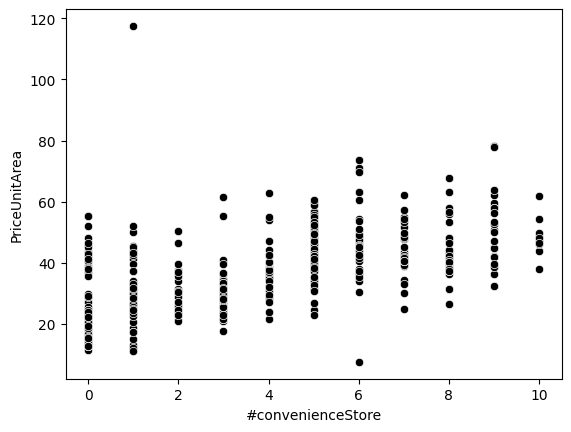

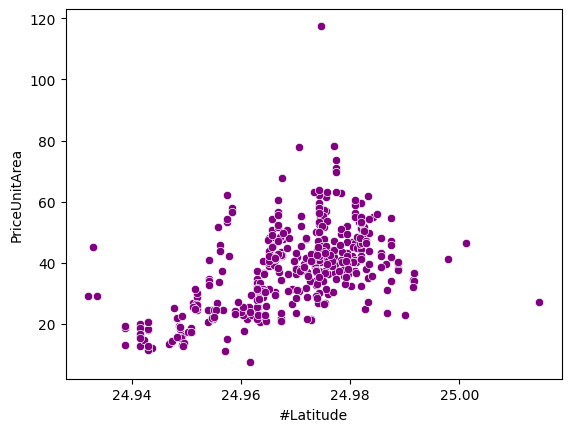

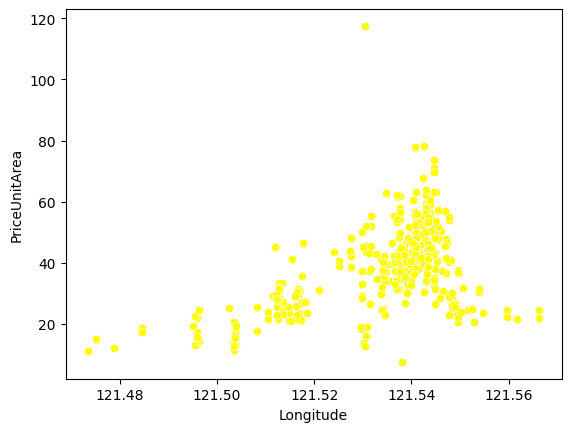

In [23]:
# Creamos una lista de colores que se usará para representar cada variable independiente
colorsforx = [ "Red", "Green", "Black", "Purple", "Yellow" ]

# Inicializamos un contador para cambiar de color en cada iteración
colorchanger = 0

'''
Recorreremos las variables independientes: DistanceMRT, HouseAge, Longitude, #Latitude, #convenienceStore. 
Exceptuando la variable dependiente: PriceUnitArea
Recorremos todas las columnas excepto la ultima.
''' 
for i in data.columns[:-1]:
       # Graficamos un scatter plot de la variable i en el eje x, con la variable dependiente en el eje y, 
       sns.scatterplot( data=data, x=i, y="PriceUnitArea", color=colorsforx[colorchanger] )
       plt.show()
       colorchanger += 1

## Entrenamos nuestro modelo

In [24]:
# Analizamos que debemos hacer en cada columna
data.columns

Index(['HouseAge', 'DistanceMRT', '#convenienceStore', '#Latitude',
       'Longitude', 'PriceUnitArea'],
      dtype='object')

### Preparación

In [25]:
# Definimos  X  y
X = data[ ['HouseAge', 'DistanceMRT', '#convenienceStore', '#Latitude', 'Longitude'] ]
y = data['PriceUnitArea']

* Dividimos el dataset

In [26]:
# Dividimos el dataset en el conjunto de pruebas y de entrenamiento
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30 )

* Normalizamos X_train, X_test

In [27]:
# Creamos una instancia del objeto StandardScaler
scaler = StandardScaler()

# Utilizamos el objeto scaler para normalizar los datos de entrenamiento X_train 
scaled_X_train = scaler.fit_transform( X_train ) # aplicamos la normalización

# Utilizamos el objeto scaler para normalizar los datos de entrenamiento X_test 
scaled_X_test = scaler.fit_transform( X_test ) # aplicamos la normalización

### Métricas para calcular la precición del modelo

Las funciones `mean_absolute_error` y `mean_squared_error`. Se Utilizan para evaluar el rendimiento de los modelos en términos de error. 

`mean_absolute_error` calcula el error absoluto medio entre las predicciones y los valores reales. Esto significa que toma el valor absoluto de la diferencia entre la predicción y el valor real y luego toma el promedio de todas estas diferencias. Es una medida de cuánto se desvía la predicción del valor real.

`mean_squared_error` calcula el error cuadrático medio. Al elevar los errores al cuadrado, se da mayor peso a los errores más grandes, lo que puede ser útil en ciertos escenarios. Sin embargo, esto también puede hacer que el error cuadrático medio sea más sensible a valores atípicos que **mean_absolute_error**.

Estas métricas se utilizan para comparar diferentes modelos y para ajustar los hiperparámetros del modelo.

In [28]:
# Esta funcion nos da los resultados del modelo
def modelresults(predictions):
    print("El error absoluto en el modelo es {}".format( mean_absolute_error(y_test, predictions) ))
    print("El error cuadrático medio en el modelo es {}".format( np.sqrt( mean_squared_error(y_test, predictions) ) ))

### Aprendizaje Supervisado - Regresión Lineal

La regresión lineal se utiliza para predecir una variable numérica continua a partir de una o más variables de entrada. Se utiliza para predecir una variable numérica continua a partir de una o más variables de entrada. La regresión lineal se basa en la idea de que existe una relación lineal entre las variables de entrada y la variable de salida.

In [29]:
lr = LinearRegression()
lr.fit( scaled_X_train, y_train )
predslr = lr.predict( scaled_X_test )

In [30]:
modelresults( predslr )

El error absoluto en el modelo es 7.161605494586964
El error cuadrático medio en el modelo es 11.19805070734148


### Aprendizaje Supervisado - Máquinas de vectores de soporte - Regresión de vectores de soporte

Se utiliza para predecir una variable continua, en lugar de una variable categórica.

Hiperparámetros: 

* `C` controla la cantidad de error permitida en el modelo
* `kernel` especifica la función del kernel utilizada para transformar los datos de entrada
* `gamma` controla la forma de la curva de decisión del modelo
* `degree` especifica el grado del polinomio a utilizar en la regresión polinómica. Controla la complejidad de la curva ajustada por el modelo

In [31]:
svrmodel = SVR()

# Definimos una cuadrícula de parámetros para ajustar los hiperparámetros del modelo
param_gridsvr = {   "C": [0.001, 0.01, 0.1, 0.5, 1], 
                    "kernel": ["linear", "rbf", "poly"],
                    "gamma": ["scale", "auto"],
                    "degree": [2, 3, 4, 5] }

# Usamos la clase GridSearchCV para encontrar los mejores hiperparámetros del modelo
gridsvr = GridSearchCV( svrmodel, param_gridsvr )
# Ajustamos el modelo con los datos de entrenamiento escalados(Normalizados)
gridsvr.fit( scaled_X_train, y_train )

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [32]:
print("Los mejores parametros para el modelo son:", gridsvr.best_params_)

Los mejores parametros para el modelo son: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


In [33]:
predsgridsvr = gridsvr.predict( scaled_X_test )

In [34]:
modelresults( predsgridsvr )

El error absoluto en el modelo es 6.673970941374037
El error cuadrático medio en el modelo es 11.03581869212879


### Aprendizaje Supervisado - Random Forest

Algoritmo de aprendizaje supervisado utilizado para problemas de clasificación y regresión. En términos generales, se basa en la creación de múltiples árboles de decisión, en los cuales cada uno utiliza una muestra aleatoria de datos y un subconjunto aleatorio de características, lo que se conoce como "bosque". Luego, para la clasificación, el algoritmo toma la predicción de cada árbol y emite la clase más común como resultado final, mientras que para la regresión, se toma la media de todas las predicciones. El Random Forest es conocido por su capacidad para manejar grandes conjuntos de datos, manejar características irrelevantes o redundantes y reducir el sobreajuste.

In [35]:
# Creamos una instancia de RandomForestRegressor
rfrmodel = RandomForestRegressor()

''' 
Especificamos un diccionario que contiene todos los posibles 
valores de los hiperparámetros que queremos explorar

* bootstrap: un valor booleano que indica si se utiliza o no la técnica 
de Bootstrap para el muestreo de datos. Cuando se establece en True, 
el algoritmo selecciona aleatoriamente los registros de entrenamiento 
para cada árbol.

* max_depth: la profundidad máxima del árbol de decisión. Un valor más 
alto permitirá al modelo aprender relaciones más complejas en los datos 
de entrenamiento, pero también puede aumentar el riesgo de sobreajuste.

* max_features: el número máximo de características que se utilizarán para 
cada árbol. Los valores posibles son "log2", que significa usar $log_2(n)$ 
características, donde $n$ es el número total de características, o 1.0, que 
significa usar todas las características.

* n_estimators: el número de árboles en el bosque aleatorio. Un mayor número 
de árboles generalmente mejora el rendimiento del modelo, pero también aumenta 
el tiempo de entrenamiento.
'''

param_gridrfr = {   "bootstrap": [True], 
                    "max_depth": [5, 10, 15],
                    "max_features": [1.0, "log2"],
                    "n_estimators": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] }

In [36]:
'''
Realiza una búsqueda exhaustiva de combinaciones de hiperparámetros dentro 
de un rango especificado y devuelve el conjunto óptimo de valores de 
hiperparámetros que producen el mejor rendimiento en el conjunto de datos
'''
gridrfr = GridSearchCV( rfrmodel, param_gridrfr )

'''
Se utiliza para ajustar el modelo RandomForestRegressor a los datos de entrenamiento 
Normalizados. Utilizando la combinación óptima de hiperparámetros encontrada por GridSearchCV
'''
gridrfr.fit( scaled_X_train, y_train )

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': [1.0, 'log2'],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [37]:
print( "Los mejores parametros para el modelo son: ", gridrfr.best_params_ )

# Se utiliza para hacer predicciones en el conjunto de datos de prueba
predsgridrfr = gridrfr.predict( scaled_X_test )

Los mejores parametros para el modelo son:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 8}


In [38]:
modelresults( predsgridrfr )

El error absoluto en el modelo es 6.036724293370133
El error cuadrático medio en el modelo es 10.355322789058091


In [39]:
X

,HouseAge,DistanceMRT,#convenienceStore,#Latitude,Longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


In [40]:
# Calcula la media de cada columna del conjunto de datos X
columnumber = 1
for index in X.columns:
    mean = data[index].mean()
    print("La media de la columna {} es {}".format( columnumber, mean ))
    columnumber += 1

La media de la columna 1 es 17.71256038647343
La media de la columna 2 es 1083.8856889130436
La media de la columna 3 es 4.094202898550725
La media de la columna 4 es 24.969030072463767
La media de la columna 5 es 121.53336108695655


In [41]:
newhouse = np.array( [17, 1083, 4, 24, 121] )
'''
1 indica que se quiere que el resultado tenga una sola fila, 
mientras que -1 se utiliza para indicar que se quiere que numpy 
calcule automáticamente el número de columnas que debe tener el 
nuevo array para que tenga la misma cantidad de elementos que el 
array original.
'''
gridrfr.predict( newhouse.reshape(1, -1) )

array([26.7125])